In [1]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

model with 3*3 kernal

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 142s 303ms/step - loss: 2.2917 - accuracy: 0.1370 - val_loss: 2.2671 - val_accuracy: 0.3519
Epoch 2/12
469/469 [==============================] - 143s 304ms/step - loss: 2.2506 - accuracy: 0.2508 - val_loss: 2.2183 - val_accuracy: 0.4990
Epoch 3/12
469/469 [==============================] - 143s 304ms/step - loss: 2.2013 - accuracy: 0.3431 - val_loss: 2.1554 - val_accuracy: 0.5730
Epoch 4/12
469/469 [==============================] - 148s 316ms/step - loss: 2.1335 - accuracy: 0.4221 - val_loss: 2.0696 - val_accuracy: 0.6225
Epoch 5/12
469/469 [==============================] - 143s 304ms/step - loss: 2.0420 - accuracy: 0.4828 - val_loss: 1.9521 - val_accuracy: 0.6600
Epoch 6/12
469/469 [==============================] - 142s 304ms/step - loss: 1.9179 - accuracy: 0.5285 - val_loss: 1.7958 - val_acc

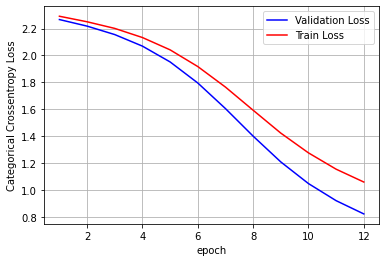

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
one = score[1]



fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)





In [3]:
pip install scikit-plot

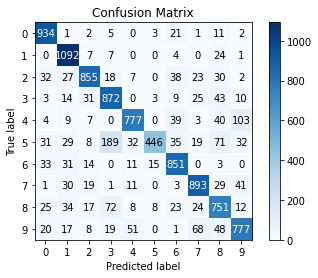

In [4]:
pred=model.predict(x_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))



model with 5*5 kernal

Epoch 1/12
469/469 [==============================] - 240s 511ms/step - loss: 3.4053 - accuracy: 0.1143 - val_loss: 2.1387 - val_accuracy: 0.2530
Epoch 2/12
469/469 [==============================] - 234s 499ms/step - loss: 2.9262 - accuracy: 0.1647 - val_loss: 1.7026 - val_accuracy: 0.5195
Epoch 3/12
469/469 [==============================] - 239s 510ms/step - loss: 2.5755 - accuracy: 0.2241 - val_loss: 1.4310 - val_accuracy: 0.6585
Epoch 4/12
469/469 [==============================] - 234s 499ms/step - loss: 2.2903 - accuracy: 0.2851 - val_loss: 1.2336 - val_accuracy: 0.7352
Epoch 5/12
469/469 [==============================] - 234s 500ms/step - loss: 2.0765 - accuracy: 0.3413 - val_loss: 1.0781 - val_accuracy: 0.7770
Epoch 6/12
469/469 [==============================] - 234s 499ms/step - loss: 1.8990 - accuracy: 0.3873 - val_loss: 0.9578 - val_accuracy: 0.8026
Epoch 7/12
469/469 [==============================] - 233s 496ms/step - loss: 1.7444 - accuracy: 0.4339 - val_loss: 0.8611 -

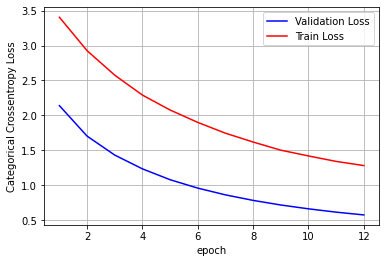

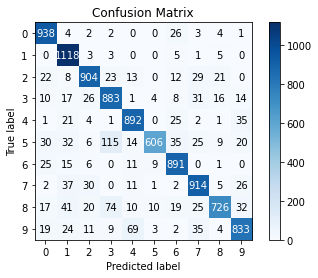

In [5]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
two = score[1]



fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)



pred=model.predict(x_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))




model with 7*7 kernal

Epoch 1/12
469/469 [==============================] - 278s 593ms/step - loss: 2.4356 - accuracy: 0.1020 - val_loss: 2.2958 - val_accuracy: 0.1097
Epoch 2/12
469/469 [==============================] - 282s 601ms/step - loss: 2.3777 - accuracy: 0.1048 - val_loss: 2.2887 - val_accuracy: 0.1421
Epoch 3/12
469/469 [==============================] - 276s 589ms/step - loss: 2.3446 - accuracy: 0.1075 - val_loss: 2.2839 - val_accuracy: 0.2034
Epoch 4/12
469/469 [==============================] - 282s 601ms/step - loss: 2.3243 - accuracy: 0.1099 - val_loss: 2.2802 - val_accuracy: 0.2901
Epoch 5/12
469/469 [==============================] - 276s 589ms/step - loss: 2.3117 - accuracy: 0.1140 - val_loss: 2.2770 - val_accuracy: 0.3738
Epoch 6/12
469/469 [==============================] - 278s 593ms/step - loss: 2.3027 - accuracy: 0.1213 - val_loss: 2.2740 - val_accuracy: 0.4372
Epoch 7/12
469/469 [==============================] - 278s 593ms/step - loss: 2.2957 - accuracy: 0.1226 - val_loss: 2.2712 -

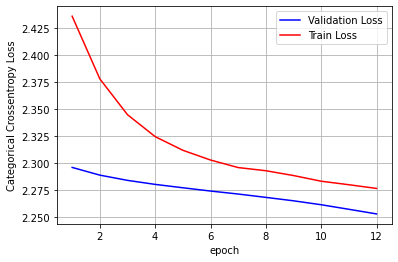

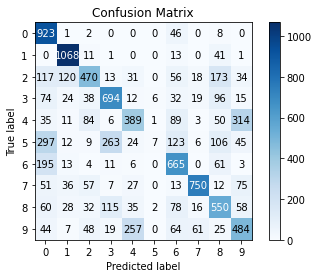

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
three = score[1]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


pred=model.predict(x_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))



In [7]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","accuracy"]
x.add_row(["model with 3*3 kernal",one])
x.add_row(["model with 5*5 kernal",two])
x.add_row(["model with 7*7 kernal",three])
print(x)

+-----------------------+--------------------+
|         model         |      accuracy      |
+-----------------------+--------------------+
| model with 3*3 kernal | 0.8248000144958496 |
| model with 5*5 kernal | 0.8705000281333923 |
| model with 7*7 kernal | 0.6000000238418579 |
+-----------------------+--------------------+


from above chart, model with 5*5 keral has .87 max accuracy, so will consider this model.